# Gaussian Process Regreession

Each movies have vector of N+1 demensions. First N demnsion might be sum of the number of the character which have those arche
types and the last demension is the value for box office.
Then make a model predicting the last dimension using first N demension.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1)

For the simple experiment, asuume we can categorize every characters in 5 types: hero,villan,mohter,innocent,animal.
Then We can get a vectorfor each movies. So it will look like this.

In [3]:
pd. Series({"hero":1,"villan":3,"mother":0,"innocent":4,"animal":0,"box office":1350})

hero             1
villan           3
mother           0
innocent         4
animal           0
box office    1350
dtype: int64

To show what Gaussian Process Regression looks like, we will apply it  to y=x*2 .
Assuming we have data points (1,1) (5,25) (6,36).
Regrression will be like below.

In [23]:
x =[[1],[5],[6]]
y = [[1],[25],[36]]


kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, normalize_y=True )
gpr.fit(x,y)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1), normalize_y=True)

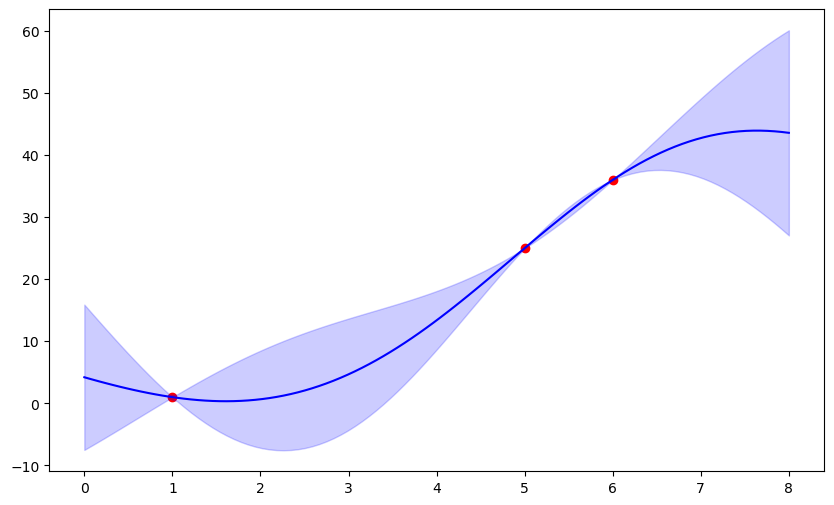

In [24]:
x_pred = np.linspace(0, 8, 100)[:, np.newaxis]

# caluculate mean and variance
y_pred, std_dev = gpr.predict(x_pred, return_std=True)
lower_bound = y_pred - 1.96 * std_dev
upper_bound = y_pred + 1.96 * std_dev

# plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, c='r', label='data')
plt.plot(x_pred, y_pred, 'b', label='prediction')
plt.fill_between(x_pred[:, 0], lower_bound, upper_bound, alpha=0.2, color='blue',label='uncertainty')



We can see this model shows uncertainty of each points

Now we apply Gaussian Process Regression to the sample case of archetypes.

In [25]:
sample_archetypes= np.random.randint(low=0, high=6, size=(100,5))
sample_boxplot = np.random.randint(low=1000,high=10000,size=100)


In [26]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, normalize_y=True )
gpr.fit(sample_archetypes, sample_boxplot)

/Users/naoki/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1), normalize_y=True)

Now we get mean and variance for each grid.

In [28]:
mean,std = gpr.predict([[0,0,0,0,0]], return_std=True)
print(mean,std)

[5663.29298883] [2283.81236893]


# Optimize based on prdeiction mean and uncertainty


We will construct some objective function to maximize. We can refer to Acquisition Function of Bayesian Optimization.
https://ekamperi.github.io/machine%20learning/2021/06/11/acquisition-functions.html#expected-improvement-ei